# Logistic Regression on IRIS dataset
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

### required modules

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder 

### load the dataset

In [2]:
iris_df = pd.read_csv("./data/iris/iris.data", header=0, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### shuffle the dataset

In [3]:
iris_df = shuffle(iris_df)
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
111,6.8,3.0,5.5,2.1,Iris-virginica
77,6.0,2.9,4.5,1.5,Iris-versicolor
33,4.9,3.1,1.5,0.1,Iris-setosa
40,4.5,2.3,1.3,0.3,Iris-setosa
112,5.7,2.5,5.0,2.0,Iris-virginica


### split features and classes

In [4]:
X_data_df = iris_df.iloc[:, 0:-1]
Y_data_df = iris_df.iloc[:, -1:]

print("Shape of Feature Matrix:", X_data_df.shape) 
print("Shape Label Vector:", Y_data_df.shape) 

Shape of Feature Matrix: (149, 4)
Shape Label Vector: (149, 1)


### one-hot encoding of labels

In [5]:
# Creating the One Hot Encoder 
oneHot = OneHotEncoder(categories='auto') 

oneHot.fit(Y_data_df) 
Y_data = oneHot.transform(Y_data_df).toarray() 

### inspect the data

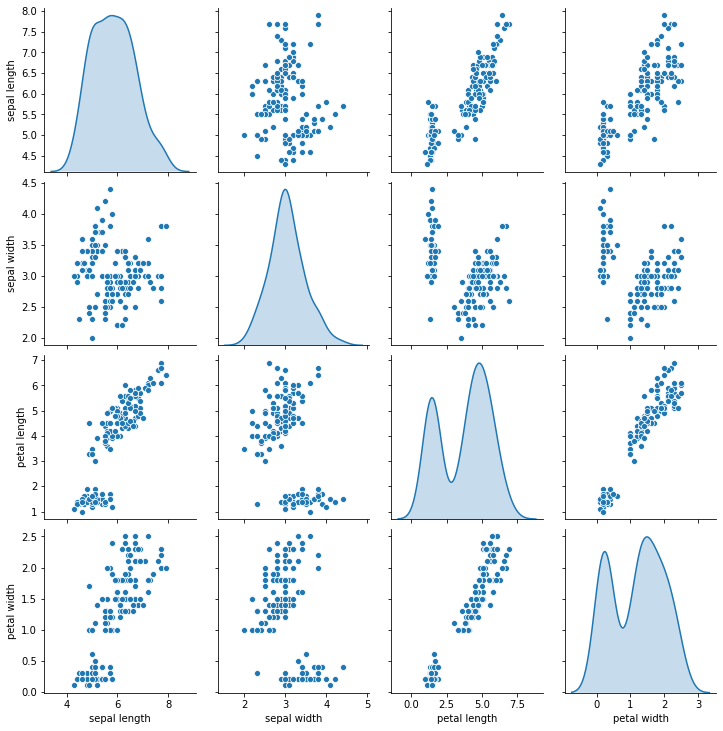

In [6]:
sns.pairplot(X_data_df[['sepal length', 'sepal width', 'petal length', 'petal width']], diag_kind='kde')

In [7]:
train_stats = X_data_df.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
sepal length,149.0,5.848322,0.828594,4.3,5.1,5.8,6.4,7.9
sepal width,149.0,3.051007,0.433499,2.0,2.8,3.0,3.3,4.4
petal length,149.0,3.774497,1.759651,1.0,1.6,4.4,5.1,6.9
petal width,149.0,1.205369,0.761292,0.1,0.3,1.3,1.8,2.5


### normalize the train data

In [8]:
mu = X_data_df.mean()
sigma = X_data_df.std()
X_data_norm = (X_data_df - mu) / sigma
X_data_norm.head()

,sepal length,sepal width,petal length,petal width
111,1.148545,-0.117663,0.980594,1.175148
77,0.183054,-0.348344,0.412300,0.387014
33,-1.144495,0.113018,-1.292584,-1.451965
40,-1.627241,-1.732431,-1.406243,-1.189253
112,-0.179005,-1.271068,0.696447,1.043792


### transform the dataframe in numpy array

In [9]:
X_data = X_data_norm.to_numpy()

print("X_data shape: ", str(X_data.shape))
print("Y_data shape: ", str(Y_data.shape))


X_data shape:  (149, 4)
Y_data shape:  (149, 3)


### build the model

In [10]:
def create_model(features, classes):

    # ------ function model ----- #
    #inputs = keras.Input(shape=(features, ), name='input')
    #h1 = keras.layers.Dense(32, activation='relu', name='h1')(inputs)
    #h2 = keras.layers.Dense(32, activation='relu', name='h2')(h1)
    #outputs = keras.layers.Dense(classes, activation='softmax', name='output')(h2)
    #model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # ----- sequential model ---- #
    model = keras.Sequential()
    model.add(keras.Input(shape=(features, ), name='input'))
    model.add(keras.layers.Dense(32, activation='relu', name='h1'))
    model.add(keras.layers.Dense(32, activation='relu', name='h2'))
    model.add(keras.layers.Dense(classes, activation='softmax', name='output'))

    optimizer = tf.keras.optimizers.Adam()

    model.compile(
        loss='categorical_crossentropy', 
        optimizer=optimizer, 
        metrics=['accuracy']
    )

    return model

    

In [11]:
model = create_model(X_data.shape[1], Y_data.shape[1])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h1 (Dense)                   (None, 32)                160       
_________________________________________________________________
h2 (Dense)                   (None, 32)                1056      
_________________________________________________________________
output (Dense)               (None, 3)                 99        
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(
    X_data,
    Y_data,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
8/8 [==============================] - 0s 24ms/step - loss: 0.9562 - accuracy: 0.6807 - val_loss: 0.8306 - val_accuracy: 0.7000
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.8269 - accuracy: 0.6891 - val_loss: 0.7257 - val_accuracy: 0.7000
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.7285 - accuracy: 0.7059 - val_loss: 0.6410 - val_accuracy: 0.7333
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6538 - accuracy: 0.7059 - val_loss: 0.5719 - val_accuracy: 0.7333
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 0.5942 - accuracy: 0.7227 - val_loss: 0.5212 - val_accuracy: 0.7667
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5491 - accuracy: 0.7479 - val_loss: 0.4820 - val_accuracy: 0.7667
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.5125 - accuracy: 0.7731 - val_loss: 0.4484 - val_accuracy: 0.8000
Epoch 8/50
8/8 [=================

In [13]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
45,0.081061,0.966387,0.104328,0.933333,45
46,0.078063,0.966387,0.102597,0.933333,46
47,0.075744,0.966387,0.100795,0.933333,47
48,0.073064,0.966387,0.099881,0.933333,48
49,0.070838,0.974790,0.098217,0.933333,49


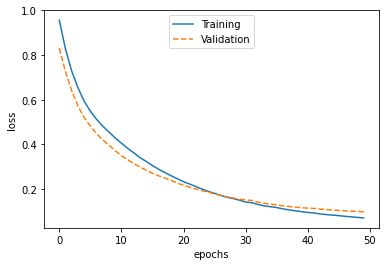

In [14]:
plt.xlabel('epochs')
plt.ylabel('loss')
#plt.ylim([0, 100])
plt.plot(history_df['epoch'], history_df['loss'], label='Training')
plt.plot(history_df['epoch'], history_df['val_loss'], label='Validation', linestyle='dashed')
plt.legend(loc='upper center', shadow=False)